In [82]:
%pylab inline

import pandas as pd
from matplotlib.patches import Patch
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [83]:
!cat rs1rs3_haps_CEU.tab rs1rs3_haps_YRI.tab rs1rs3_haps_CHB.tab rs1rs3_haps_PEL.tab rs1rs3_haps_BEB.tab rs1rs3_haps_MXL.tab rs1rs3_haps_JPT.tab rs1rs3_haps_LWK.tab rs1rs3_haps_GBR.tab rs1rs3_haps_GIH.tab | sort -k1,1 -k2,2 > rs1rs3_haps_combined.tab

In [84]:
haps = pd.read_csv("rs1rs3_haps_combined.tab",
                  names=["pop", "count", "rs1","rs3"], delim_whitespace=True)

(0.1760784012930413, 8.69745738478961e-08)

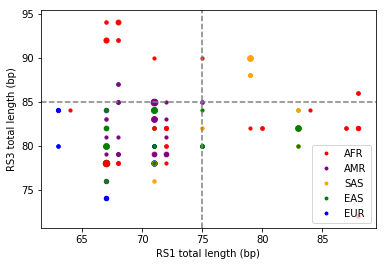

In [86]:
# Plot RS1 vs. RS3, color by population
# Summary: short RS1 and long RS3 seem to be specific to Africa

fig = plt.figure()
ax = fig.add_subplot(111)

all_rs1 = []
all_rs3 = []
popcolors = {
    "YRI": "red",
    "LWK": "red",
    "PEL": "purple",
    "MXL": "purple",
    "GIH": "orange",
    "BEB": "orange",
    "CHB": "green",
    "JPT": "green",
    "GBR": "blue",
    "CEU": "blue",
}
superpopcolors = {
    "AFR": "red",
    "AMR": "purple",
    "SAS": "orange",
    "EAS": "green",
    "EUR": "blue"
}
for i in range(haps.shape[0]):
    rs1len = len(haps["rs1"].values[i])
    rs3len = len(haps["rs3"].values[i])
    count = haps["count"].values[i]
    pop = haps["pop"].values[i]
    ax.scatter([rs1len], [rs3len], s=count*2, color=popcolors[pop])
    all_rs1.extend([rs1len]*count)
    all_rs3.extend([rs3len]*count)
    
legend_elements = [ Line2D([0], [0], marker='o', color='w', label=pop,
                          markerfacecolor=superpopcolors[pop], markersize=5) for pop in superpopcolors]
ax.legend(handles=legend_elements, loc="lower right")
ax.axhline(y=85, linestyle="dashed", color="gray")
ax.axvline(x=75, linestyle="dashed", color="gray")

ax.set_xlabel("RS1 total length (bp)")
ax.set_ylabel("RS3 total length (bp)");

scipy.stats.pearsonr(all_rs1, all_rs3)

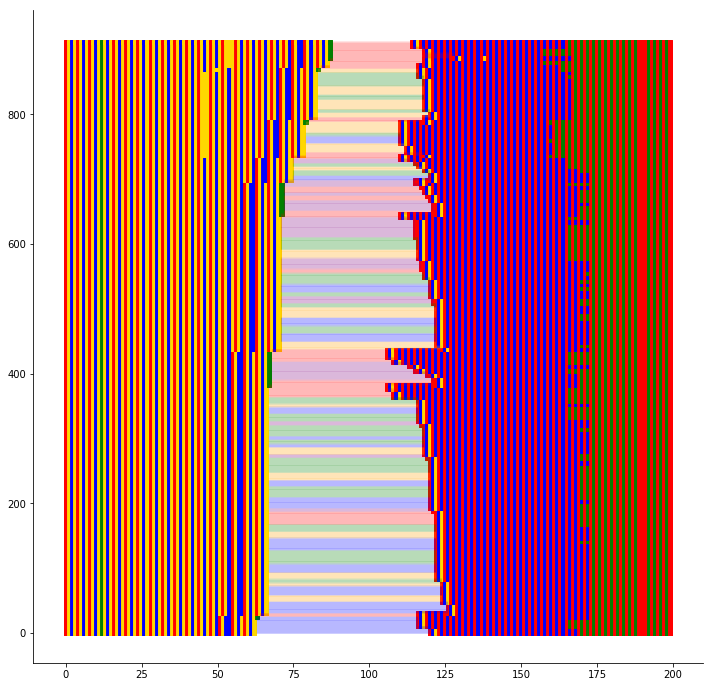

In [87]:
# "waterfall" plots
# left align RS1, right align RS3
# color rectangles by nucleotides

haps["rs1.len"] = haps["rs1"].apply(len)
haps["rs3.len"] = haps["rs3"].apply(len)

nuccolors = {"A": "red", "C": "blue","T": "gold", "G": "green"}

def PlotPop(haps):
    hapset = haps.sort_values(["rs1.len", "rs3.len"])

    fig = plt.figure()
    fig.set_size_inches((12, 12))
    ax = fig.add_subplot(111)


    yval = 0

    for i in range(hapset.shape[0]):
        rs1 = hapset["rs1"].values[i]
        rs3 = hapset["rs3"].values[i]
        count = hapset["count"].values[i]
        pop = hapset["pop"].values[i]
        
    
        # Plot RS1 from left, RS3 from right
        offset = 200-len(rs3)
        for c in range(count):
            ax.plot([len(rs1), offset], [yval,yval], linewidth=0.2, color=popcolors[pop])
            ax.scatter(range(len(rs1)), [yval]*len(rs1), color=[nuccolors[rs1[j]] for j in range(len(rs1))],
                  marker="s", s=20)
            ax.scatter([j+offset for j in range(len(rs3))], [yval]*len(rs3), color=[nuccolors[rs3[j]] for j in range(len(rs3))],
                  marker="s", s=20)

            yval += 1
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

PlotPop(haps)